## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

## Load Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


## EDA

### Cleaning the dataset

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In our dataset we don't have any null values and data types doesn't need to fix. Everything is ok!!

### Explore

In [5]:
train["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [6]:
train["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [7]:
train["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

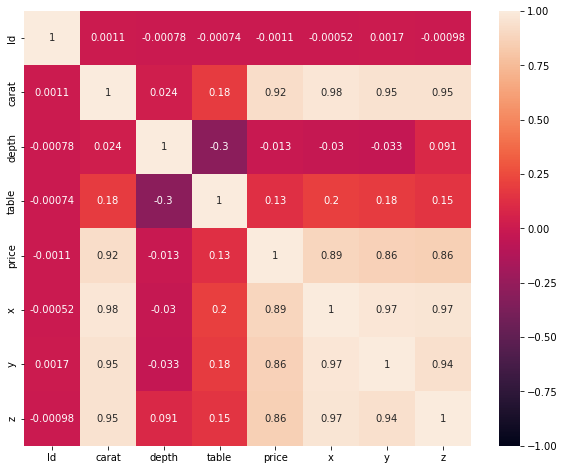

In [8]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, vmin=-1, vmax=1, annot=True, ax=ax)
plt.show()

As we can see on the above heatmap that "table" and "depth" columns have a low correlation with the price then we will not consider them in model training

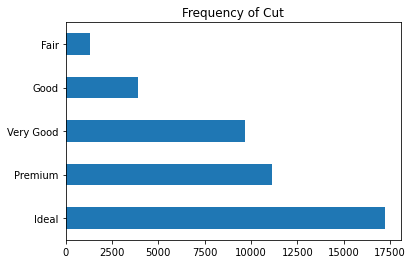

In [9]:
train["cut"].value_counts().plot.barh().set_title("Frequency of Cut");

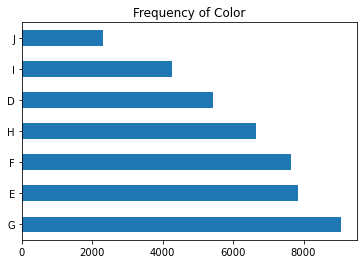

In [10]:
train["color"].value_counts().plot.barh().set_title("Frequency of Color");

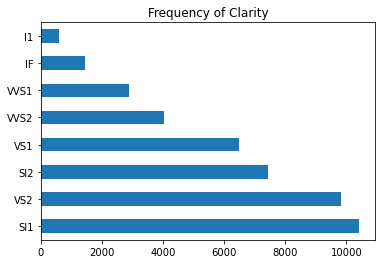

In [11]:
train["clarity"].value_counts().plot.barh().set_title("Frequency of Clarity");

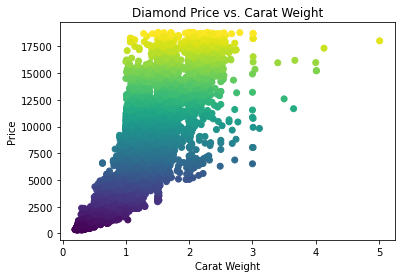

In [12]:
plt.scatter(train["carat"], train["price"], c=train["price"])
plt.title("Diamond Price vs. Carat Weight")
plt.xlabel("Carat Weight")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Frequency')

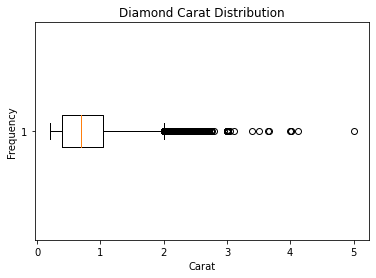

In [13]:
plt.boxplot(train["carat"], vert=False)
plt.title("Diamond Carat Distribution")
plt.xlabel("Carat")
plt.ylabel("Frequency")

There is outlires! we need to delete them!!

In [14]:
low, high = train["carat"].quantile([0,0.98])
mask = train["carat"].between(low, high)
train = train[mask]

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42319 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       42319 non-null  int64  
 1   carat    42319 non-null  float64
 2   cut      42319 non-null  object 
 3   color    42319 non-null  object 
 4   clarity  42319 non-null  object 
 5   depth    42319 non-null  float64
 6   table    42319 non-null  float64
 7   price    42319 non-null  int64  
 8   x        42319 non-null  float64
 9   y        42319 non-null  float64
 10  z        42319 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.9+ MB


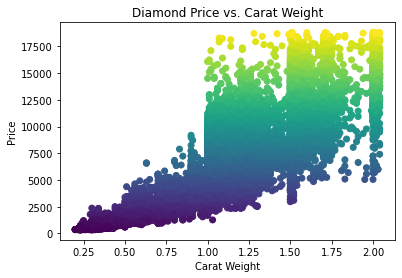

In [16]:
plt.scatter(train["carat"], train["price"], c=train["price"])
plt.title("Diamond Price vs. Carat Weight")
plt.xlabel("Carat Weight")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Frequency')

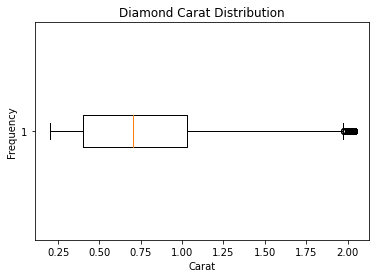

In [17]:
plt.boxplot(train["carat"], vert=False)
plt.title("Diamond Carat Distribution")
plt.xlabel("Carat")
plt.ylabel("Frequency")

Now everything is ok. We are ready to train our model!

## Train and Split

In [18]:
train = pd.get_dummies(train, ['cut', 'color', 'clarity'])
train.head()

,Id,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,1.06,61.8,57.0,4270,6.57,6.60,4.07,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,1.51,60.9,58.0,15164,7.38,7.42,4.51,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0.32,61.3,56.0,828,4.43,4.41,2.71,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0.53,61.2,56.0,1577,5.19,5.22,3.19,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.70,61.0,57.0,2596,5.76,5.72,3.50,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
features = train.drop("price", axis=1)
target = train["price"]

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.20,
                                                    random_state = 0)

In [20]:
cat_cols = ["cut", "color", "clarity"]
num_cols = ["carat", "x", "y", "z"]
ct = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), cat_cols),
    ('scale', StandardScaler(), num_cols)
], remainder='passthrough')

In [21]:
model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1058927.810350428


In [26]:
X_test_pred = pd.get_dummies(test, ['cut', 'color', 'clarity'])
#X_test_pred = X_test_pred.drop(["depth", "table"], axis=1)
X_test_pred.head()

,Id,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.34,61.1,57.0,4.52,4.48,2.75,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,0.71,62.7,58.0,5.74,5.68,3.58,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0.44,62.8,56.0,4.83,4.88,3.05,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,4,0.81,60.1,59.0,6.09,6.03,3.65,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0.40,61.2,56.0,4.74,4.80,2.92,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [27]:
predicitons = model.predict(X_test_pred)
predicitons

array([ 1331.49941982,  3365.13861102,   407.67259168, ...,
        4384.54144161,  5562.27730842, 14970.73530251])

In [28]:
submission = test[["Id"]]
submission["price"] = predicitons
submission

C:\Users\Kershrita\AppData\Local\Temp\ipykernel_6080\4227958648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["price"] = predicitons


,Id,price
0,1,1331.499420
1,2,3365.138611
2,3,407.672592
3,4,2753.433774
4,5,1772.017502
...,...,...
10783,10784,2036.659133
10784,10785,6235.006036
10785,10786,4384.541442
10786,10787,5562.277308


In [50]:
submission.to_csv("submission.csv", index=None)